In [4]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [25]:
# HIDDEN
import scipy.stats as stats

## Random Variables

Almost all real-world phenomena contain some degree of randomness, making data generation and collection inherently random processes. Since we fit our models on these data, our models also contain randomness. To represent these random processes mathematically, we use random variables.

A **random variable** is an algebraic variable that represents a **numerical value determined by a probabilistic event**. In this book, we will always use capital letters (not Greek letters) like $ X $ or $ Y $ to denote a random variable. Although random variables can represent either discrete (e.g. the number of males in a sample of ten people) or continuous quantities (e.g. the average temperature in Los Angeles), we will only use discrete random variables for the purposes of this textbook.

We must always specify what a given random variable represents. For example, we may write that the random variable $ X $ represents the number of heads in 10 coin flips. The definition of a random variable determines the values it can take on. In this example, $ X $ may only take on values between $ 0 $ and $ 10 $ inclusive.

We must also be able to determine the probability that the random variable takes on each of its possible values. For example, the probability that $ X = 0 $ is written as $ P(X = 0) = (0.5)^{10} $ and we can likewise calculate the probability that $ X $ is any value in $ \{ 0, 1, \ldots, 10 \} $.

### Probability Mass Functions

The **probability mass function (PMF)** or the **distribution** of a random variable $X$ provides the probability that $X$ takes on each of its possible values. If we let $\mathbb{X}$ be the set of values that $X$ can take on and $x$ be a particular value in $\mathbb{X}$, the PMF of $X$ must satisfy the following rules:

$$
1) \sum_{x \in \mathbb{X}} P(X = x) = 1
$$

$$
2) \text{ For all } x \in \mathbb{X}, 0 \leq P(X = x) \leq 1
$$

The first rule states that the probabilities for all possible values of $ X $ sum to $ 1 $.

The second rule states that each individual probability for a given value of $ X $ must be between $ 0 $ and $ 1 $.

Suppose we let $ X $ represent the result of one roll from a fair six-sided die. We know that $ X \in \{1, 2, 3, 4, 5, 6\} $ and that $ P(X = 1) = P(X = 2) = \ldots = P(X = 6) = \frac{1}{6} $. We can plot the PMF of $ X $ as a probability distribution:

In [14]:
# HIDDEN

def plot_pmf(xs, probs, rv_name='X'):
    plt.plot(xs, probs, 'ro', ms=12, mec='b', color='b')
    plt.vlines(xs, 0, probs, colors='b', lw=4)
    plt.xlabel('$x$')
    plt.ylabel('$P(X = x)$')
    plt.ylim(0, 1)
    plt.title('PMF of $X$');

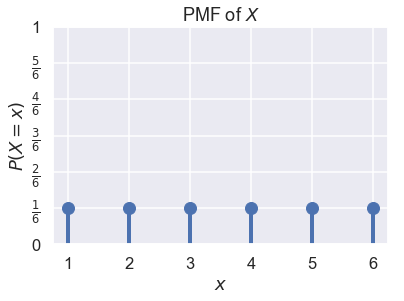

In [24]:
# HIDDEN
xk = np.arange(1, 7)
pk = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

plot_pmf(np.arange(1, 7), np.repeat(1/6, 6))

plt.yticks(np.linspace(0, 1, 7),
           ('0', r'$\frac{1}{6}$', r'$\frac{2}{6}$', r'$\frac{3}{6}$',
            r'$\frac{4}{6}$', r'$\frac{5}{6}$', '1'));

### Joint Distributions

The notion of PMFs for single random variables extends naturally to joint distributions for multiple random variables. In particular, the **joint distribution** of two or more random variables yields the probability that these random variables simultaneously take on a specific set of values.

For example, let the random variable $ X $ represent the number of heads in 10 coin flips, and let $ Y $ represent the number of tails in the same set of 10 coin flips. We can note that:

$$P(X=0, Y=10) = P(X=10, Y=0) = (0.5)^{10}$$

Meanwhile $P(X=6, Y=6) = 0$ since we cannot possibly have 6 heads and 6 tails in 10 coin flips.

#### Marginal Distributions

Sometimes, we start with the joint distribution for two random variables $X$ and $Y$ but want to find the distribution for $X$ alone. This distribution is called the **marginal distribution**. To find the probability that $X$ takes on a particular value, we must consider all possible values of $Y$ (denoted by $\mathbb{Y}$) that can simultaneously happen with $X$ and sum over all of these joint probabilities:

$$
\begin{aligned}
\sum_{y \in \mathbb{Y}} P(X=x, Y=y) &= P(X=x)
\end{aligned}
$$

We can prove this identity as follows:

$$
\begin{aligned}
\sum_{y \in \mathbb{Y}} P(X=x, Y=y)	&= \sum_{y \in \mathbb{Y}} P(X=x) \times P(Y=y \; \vert \; X=x)\\
&= P(X=x) \times \sum_{y \in \mathbb{Y}} P(Y=y \; \vert \; X=x)\\
&= P(X=x) \times 1 \\
&= P(X=x)
\end{aligned}
$$

In the last line of this proof, we treated $Y \; \vert \; X = x$ as a random variable with some unknown PMF. This is important since we used the property that the probabilities in a PMF sum to $1$, which means that $\sum_{y\in \mathbb{Y}} P(Y = y \; \vert \; X = x) = 1$.

#### Independent Random Variables

Like events, two random variables can be dependent or independent. Any two random variables are independent if and only if knowing the outcome of one variable does not alter the probability of observing any outcomes of the other variable.

For example, suppose we flip a coin ten times and let $ X $ be the number of heads and $ Y $ be the number of tails. Clearly, $ X $ and $ Y $ are dependent variables since knowing that $ X = 0 $ means that $ Y $ must equal $ 10 $. If we did not observe the value of $ X $, $ Y $ can take on any value between $ 0 $ and $ 10 $ with non-zero probability.

We might instead conduct two sets of ten flips. If $ X $ is the number of heads in the first set of flips and $ Y $ is the number of heads in the second set, $ X $ and $ Y $ are independent since the outcomes of the first set of ten flips do not affect the outcomes of the second set.

### An Example with Ages

Suppose we have a small dataset of four people:

In [7]:
# HIDDEN
data={"Name":["Carol","Bob","John","Dave"], 'Age': [50,52,51,50]}
people = pd.DataFrame(data)
people

,Name,Age
0,Carol,50
1,Bob,52
2,John,51
3,Dave,50


Suppose we sample two people from this dataset with replacement. If the random variable $ Z $ represents the difference between the ages of the first and second persons in the sample, what is the PMF of $ Z $?

To approach this problem, we define two new random variables. We define $ X $ as the age of the first person and $ Y $ as the age of the second. Then, $ Z = X - Y $. Then, we find the joint probability distribution of $ X $ and $ Y $: the probability of each value that $ X $ and $ Y $ can take on simultaneously. In this case, note that $ X $ and $ Y $ are independent and identically distributed; the two random variables represent two independent draws from the same dataset, and the first draw has no influence on the second. For example, the probability that $ X = 51 $ and $ Y = 50 $ is $ P(X = 51, Y = 50) = \frac{1}{4} \cdot \frac{2}{4} = \frac{2}{16} $. In a similar way, we get:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>4/16</td>
    <td>2/16</td>
    <td>2/16</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/16</td>
    <td>1/16</td>
    <td>1/16</td>
  </tr>
</table>

Let us now consider the case in which we sample two people from the same dataset as above but without replacement. As before, we define $X$ as the age of the first person and $Y$ as the age of the second, and $Z = X - Y$. However, now $X$ and $Y$ are not independent; for example, if we know $X = 51$, then $Y \neq 51$. We find the joint distribution of $X$ and $Y$ as follows:

<table>
  <tr>
    <th></th>
    <th>$Y=50$</th>
    <th>$Y=51$</th>
    <th>$Y=52$</th>
  </tr>
  <tr>
    <td>$X=50$</td>
    <td>2/12</td>
    <td>2/12</td>
    <td>2/12</td>
  </tr>
  <tr>
    <td>$X=51$</td>
    <td>2/12</td>
    <td>0</td>
    <td>1/12</td>
  </tr>
  <tr>
    <td>$X=52$</td>
    <td>2/12</td>
    <td>1/12</td>
    <td>0</td>
  </tr>
</table>

We can also find the marginal distribution of $Y$ from the table.

$$
\begin{aligned}
P(Y = 50) &= P(Y = 50, X = 50) + P(Y = 50, X = 51) + P(Y = 50, X = 52) \\
&= \frac{2}{12} + \frac{2}{12} + \frac{2}{12} \\
&= \frac{1}{2} \\
P(Y = 51) &= \frac{2}{12} + 0 + \frac{1}{12} = \frac{1}{4} \\
P(Y = 52) &= \frac{2}{12} + \frac{1}{12} + 0 = \frac{1}{4}
\end{aligned}
$$

Notice that we summed each column of the joint distribution table above. One can imagine computing the sum of each column and writing the result in the margin below the table; this is the origin of the term marginal distribution.

You should also notice that $ X $ and $ Y $ are not independent when we sample without replacement. If $ X = 52 $, for example, $ Y \neq 52 $. Nonetheless, $X$ and $Y$ still have the same marginal distribution.

## Summary

In this section, we introduce random variables, mathematical variables that take on values according to a random process. These outcomes must be defined completely and precisely—each outcome must have a well-defined probability of occurrence. Random variables are useful for representing many random phenomena, including the process of data collection.